In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la database

In [2]:
df = pd.read_csv('QueryResultsSO.csv')
df.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,739,60277.0,<p>I want to use a <code>Track-Bar</code> to c...,8.0,...,2021-02-26 03:31:15,2021-02-26 03:31:15,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...,14.0,5,57.0,NaN,2012-10-31 16:42:47,CC BY-SA 4.0
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,310,21935.0,<p>I have an absolutely positioned <code>div</...,9.0,...,2021-01-29 18:46:45,2021-01-29 18:46:45,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>,7.0,1,12.0,NaN,NaN,CC BY-SA 4.0
2,7,2,NaN,4.0,2008-07-31 22:17:57,NaN,490,NaN,<p>An explicit cast to <code>double</code> lik...,9.0,...,2019-10-21 14:03:54,2019-10-21 14:03:54,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
3,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,2053,697128.0,<p>Given a <code>DateTime</code> representing ...,1.0,...,2021-01-05 17:33:32,2021-09-24 16:38:57,How do I calculate someone's age based on a Da...,<c#><.net><datetime>,67.0,10,479.0,NaN,2011-08-16 19:40:43,CC BY-SA 4.0
4,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1590,181568.0,<p>Given a specific <code>DateTime</code> valu...,1.0,...,2017-06-04 15:51:19,2021-09-01 21:49:09,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,40.0,3,550.0,NaN,2009-09-04 13:15:59,CC BY-SA 3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     50000 non-null  int64  
 1   PostTypeId             50000 non-null  int64  
 2   AcceptedAnswerId       7890 non-null   float64
 3   ParentId               40267 non-null  float64
 4   CreationDate           50000 non-null  object 
 5   DeletionDate           0 non-null      float64
 6   Score                  50000 non-null  int64  
 7   ViewCount              9733 non-null   float64
 8   Body                   50000 non-null  object 
 9   OwnerUserId            47823 non-null  float64
 10  OwnerDisplayName       43360 non-null  object 
 11  LastEditorUserId       19479 non-null  float64
 12  LastEditorDisplayName  10844 non-null  object 
 13  LastEditDate           19793 non-null  object 
 14  LastActivityDate       50000 non-null  object 
 15  Ti

In [4]:
#Récupération des colonnes utiles

df=df[['Id','CreationDate','Score','Body','Title','Tags','ViewCount','AnswerCount','CommentCount']]
df.dropna(subset = ['Tags'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9733 entries, 0 to 49998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            9733 non-null   int64  
 1   CreationDate  9733 non-null   object 
 2   Score         9733 non-null   int64  
 3   Body          9733 non-null   object 
 4   Title         9733 non-null   object 
 5   Tags          9733 non-null   object 
 6   ViewCount     9733 non-null   float64
 7   AnswerCount   9733 non-null   float64
 8   CommentCount  9733 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 760.4+ KB


In [5]:
#visualisation des data

df.describe()

,Id,Score,ViewCount,AnswerCount,CommentCount
count,9733.000000,9733.000000,9.733000e+03,9733.000000,9733.000000
mean,44783.685092,61.581732,4.737214e+04,7.029487,0.668653
std,24239.792108,303.574259,1.885036e+05,8.411580,1.635772
min,4.000000,-7.000000,7.600000e+01,0.000000,0.000000
25%,25277.000000,3.000000,1.700000e+03,3.000000,0.000000
50%,45582.000000,8.000000,5.334000e+03,5.000000,0.000000
75%,64436.000000,26.000000,2.162200e+04,8.000000,1.000000
max,87179.000000,8708.000000,4.569002e+06,296.000000,28.000000


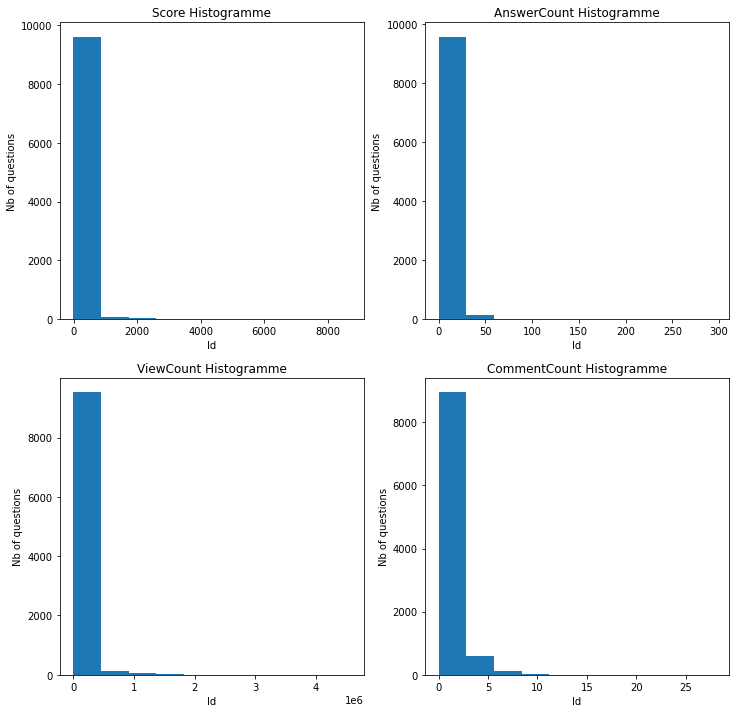

In [6]:
#Visualition du score, Views

fig, axs = plt.subplots(2, 2,figsize=(12,12))

df['Score'].plot.hist(ax = axs[0,0])

df['ViewCount'].plot.hist(ax = axs[1,0])

df['AnswerCount'].plot.hist(ax = axs[0,1])

df['CommentCount'].plot.hist(ax = axs[1,1])


axs[0,0].set_title('Score Histogramme')
axs[0,0].set_xlabel('Id')
axs[0,0].set_ylabel('Nb of questions')

axs[1,0].set_title('ViewCount Histogramme')
axs[1,0].set_xlabel('Id')
axs[1,0].set_ylabel('Nb of questions')

axs[0,1].set_title('AnswerCount Histogramme')
axs[0,1].set_xlabel('Id')
axs[0,1].set_ylabel('Nb of questions')

axs[1,1].set_title('CommentCount Histogramme')
axs[1,1].set_xlabel('Id')
axs[1,1].set_ylabel('Nb of questions')

plt.show()

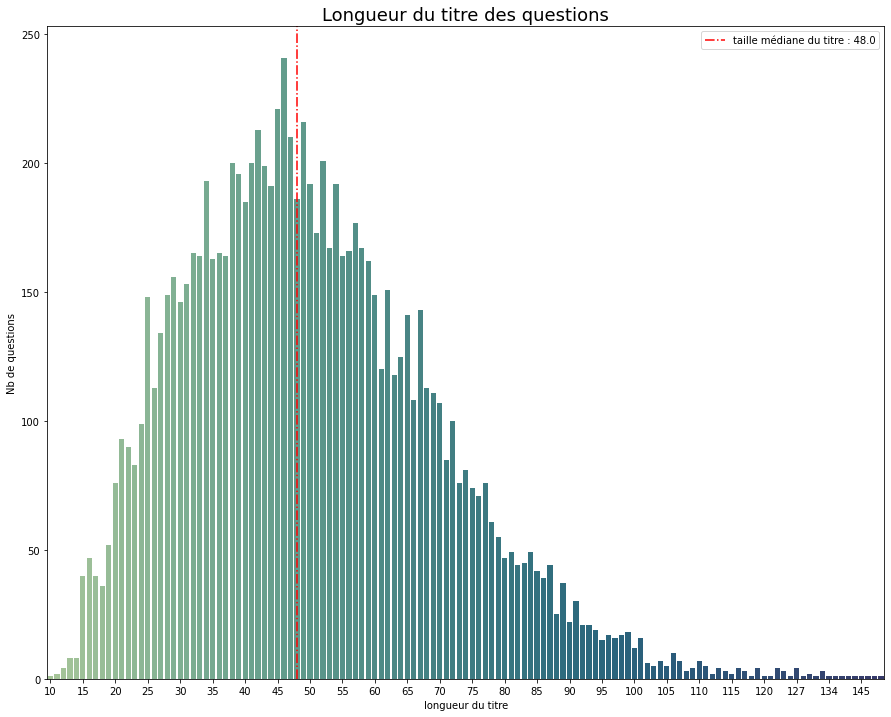

In [7]:
#Visualisation de la longueur des titres des questions

fig = plt.figure(figsize=(15, 12))

ax = sns.countplot(x=df.Title.str.len(),palette = 'crest')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))
plt.axvline(df.Title.str.len().median() - df.Title.str.len().min(),
            color="r", linestyle='-.',
            label="taille médiane du titre : "+str(df.Title.str.len().median()))

ax.set_xlabel("longueur du titre")
ax.set_ylabel('Nb de questions')
plt.title("Longueur du titre des questions",
          fontsize=18, color="black")
plt.legend()
plt.show()


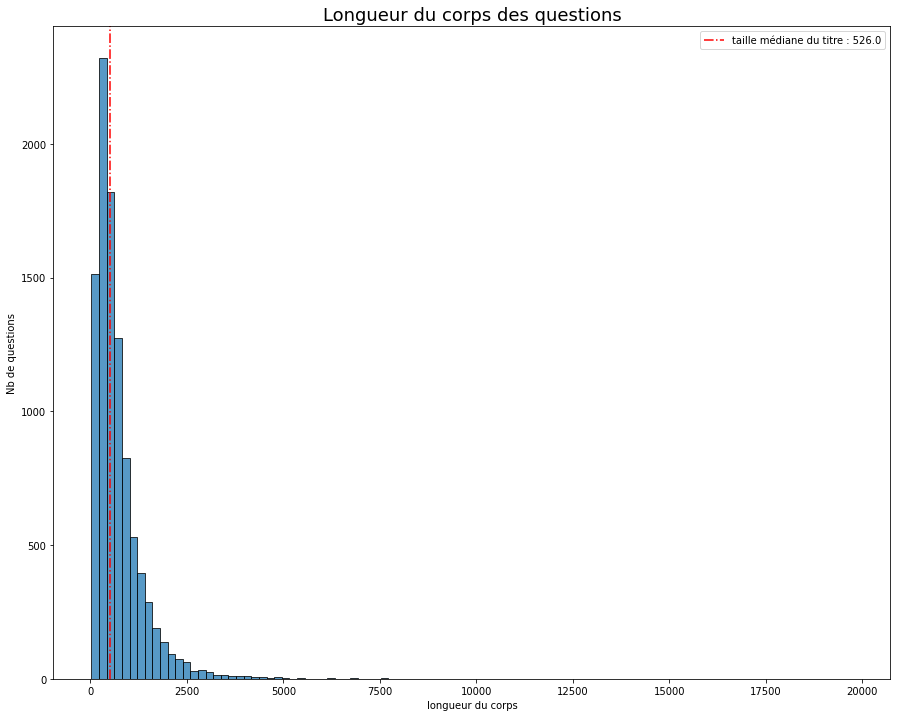

In [8]:
# Visualisation de la longueur du corps des questions 

fig = plt.figure(figsize=(15, 12))
ax = sns.histplot(x=df.Body.str.len(),palette = 'Paired',bins= 100)
start, end = ax.get_xlim()

plt.axvline(df.Body.str.len().median() - df.Body.str.len().min(),
            color="r", linestyle='-.',
            label="taille médiane du titre : "+str(df.Body.str.len().median()))
ax.set_xlabel("longueur du corps")
ax.set_ylabel('Nb de questions')
plt.title("Longueur du corps des questions",
          fontsize=18, color="black")

plt.legend()
plt.show()

In [9]:
#Suppression des lignes avec un corps > 5000 mots

df = df[df.Body.str.len() <= 5000]


### Analyse des tags

In [10]:
df['Tags'].head(7)

0    <c#><floating-point><type-conversion><double><...
1                     <html><css><internet-explorer-7>
3                                 <c#><.net><datetime>
4    <c#><datetime><time><datediff><relative-time-s...
6    <html><browser><timezone><user-agent><timezone...
7                                         <.net><math>
8                   <c#><linq><web-services><.net-3.5>
Name: Tags, dtype: object

In [11]:
# on remplace les '< >'
df['Tags'] = df['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))

# suppression de la dernière "," pour chaque ligne
df['Tags'] = df['Tags'].str[:-1]
df['Tags'].head(8)

0    c#,floating-point,type-conversion,double,decimal
1                        html,css,internet-explorer-7
3                                    c#,.net,datetime
4        c#,datetime,time,datediff,relative-time-span
6    html,browser,timezone,user-agent,timezone-offset
7                                           .net,math
8                       c#,linq,web-services,.net-3.5
9             mysql,database,binary-data,data-storage
Name: Tags, dtype: object

In [12]:
# Création d'une liste pour visualiser les tags les plus fréquents 

separator = ','
list_words = []
for word in df['Tags'].str.split(separator):
    list_words.extend(word)
df_list_words = pd.DataFrame(list_words, columns=["Tag"])
df_list_words = df_list_words.groupby("Tag").agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
df_list_words.sort_values("tag_count", ascending=False, inplace=True)

In [13]:
print("Le jeu de données compte {} tags.".format((df_list_words.shape[0])))

Le jeu de données compte 3765 tags.


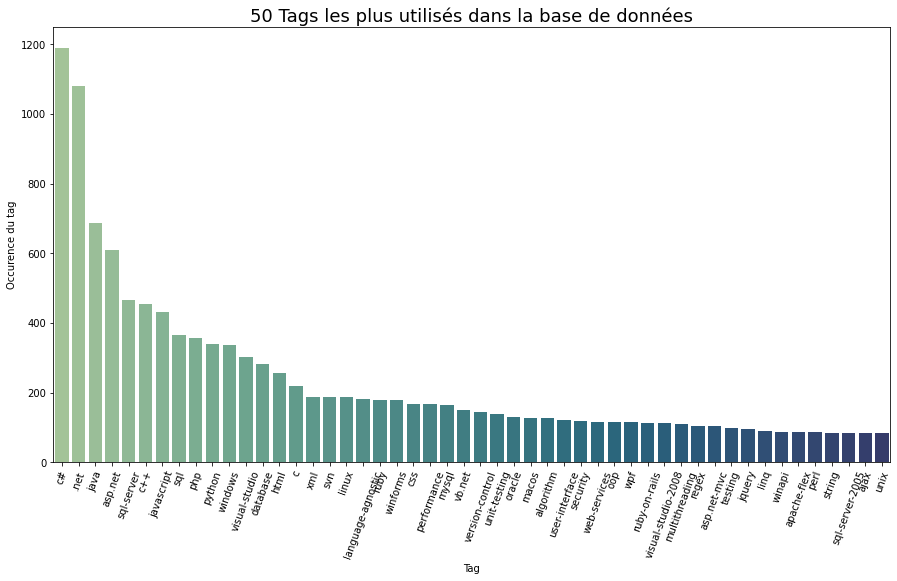

In [14]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=df_list_words.iloc[0:50, :],
            x=df_list_words.iloc[0:50, :].index,
            y="tag_count", palette = 'crest')
plt.xticks(rotation=70)
plt.ylabel('Occurence du tag')
plt.title("50 Tags les plus utilisés dans la base de données",
          fontsize=18)
plt.show()

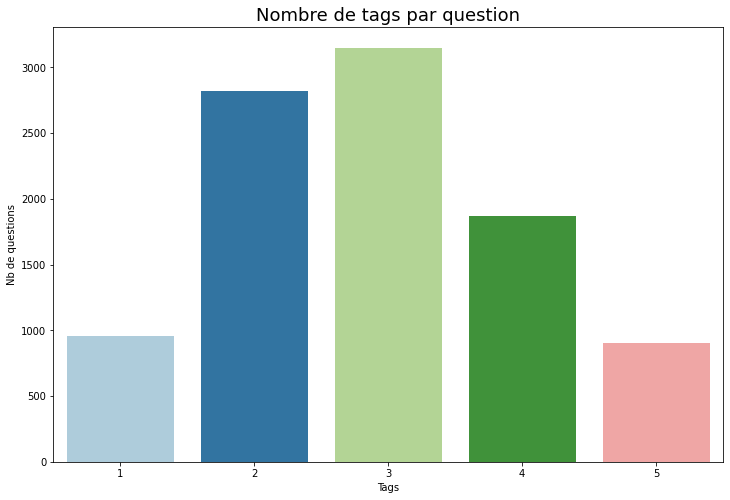

In [15]:
#Nombre de tags par question

df['Tags_list'] = df['Tags'].str.split(',')
df['Tags_count'] = df['Tags_list'].apply(lambda x: len(x))

# Plot the result
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=df.Tags_count,palette = 'Paired')
ax.set_xlabel("Tags")
ax.set_ylabel('Nb de questions')
plt.title("Nombre de tags par question",
          fontsize=18)
plt.show()

In [16]:
# Retrait des tags les moins utilisés

def filter_tag(x, top_list):
    """Comparison of the elements of 2 lists to 
    check if all the tags are found in a list of top tags.

    Parameters
    ----------------------------------------
    x : list
        List of tags to test.
    ----------------------------------------
    """
    temp_list = []
    for item in x:
        if (item in top_list):
            #x.remove(item)
            temp_list.append(item)
    return temp_list

top_tags = list(df_list_words.iloc[0:50].index)
df['Tags_list'] = df['Tags_list']\
                    .apply(lambda x: filter_tag(x, top_tags))
df['number_of_tags'] = df['Tags_list'].apply(lambda x : len(x))
df = df[df.number_of_tags > 0]
print("New size of dataset : {} questions.".format(df.shape[0]))

df.head(10)

New size of dataset : 7696 questions.


,Id,CreationDate,Score,Body,Title,Tags,ViewCount,AnswerCount,CommentCount,Tags_list,Tags_count,number_of_tags
0,4,2008-07-31 21:42:52,739,<p>I want to use a <code>Track-Bar</code> to c...,How to convert a Decimal to a Double in C#?,"c#,floating-point,type-conversion,double,decimal",60277.0,14.0,5,[c#],5,1
1,6,2008-07-31 22:08:08,310,<p>I have an absolutely positioned <code>div</...,Why did the width collapse in the percentage w...,"html,css,internet-explorer-7",21935.0,7.0,1,"[html, css]",3,2
3,9,2008-07-31 23:40:59,2053,<p>Given a <code>DateTime</code> representing ...,How do I calculate someone's age based on a Da...,"c#,.net,datetime",697128.0,67.0,10,"[c#, .net]",3,2
4,11,2008-07-31 23:55:37,1590,<p>Given a specific <code>DateTime</code> valu...,Calculate relative time in C#,"c#,datetime,time,datediff,relative-time-span",181568.0,40.0,3,[c#],5,1
6,13,2008-08-01 00:42:38,664,<p>Is there a standard way for a web server to...,Determine a user's timezone,"html,browser,timezone,user-agent,timezone-offset",235851.0,26.0,9,[html],5,1
7,14,2008-08-01 00:59:11,463,"<p>What is the difference between <a href=""htt...",Difference between Math.Floor() and Math.Trunc...,".net,math",155369.0,13.0,1,[.net],2,1
8,16,2008-08-01 04:59:33,148,<p>How do you expose a LINQ query as an ASMX w...,Filling a DataSet or a DataTable from a LINQ q...,"c#,linq,web-services,.net-3.5",86022.0,7.0,0,"[c#, linq, web-services]",4,3
9,17,2008-08-01 05:09:55,193,"<p>How do I store binary data in <a href=""http...",Binary Data in MySQL,"mysql,database,binary-data,data-storage",81850.0,9.0,3,"[mysql, database]",4,2
11,19,2008-08-01 05:21:22,335,<p>I'm looking for the fastest way to obtain t...,What is the fastest way to get the value of π?,"performance,algorithm,language-agnostic,unix,pi",60868.0,22.0,17,"[performance, algorithm, language-agnostic, unix]",5,4
13,24,2008-08-01 12:12:19,189,<p>If I have a trigger before the update on a ...,Throw an error preventing a table update in a ...,"mysql,database,triggers",91820.0,7.0,0,"[mysql, database]",3,2


# Preprocessing des features

### retrait des balises HTML

In [17]:
#Suppression des balises HTML 
'''
remove_balise_html(html_doc, parser = 'html.parser')
remove html balises on an str file
args : 
    - html_doc = html document to clean
    - parser
'''
from bs4 import BeautifulSoup

def remove_balise_html(html_doc,parser='html.parser'):
    cleantext = BeautifulSoup(html_doc, parser).text
    return cleantext

df['Body'] = df['Body'].apply(remove_balise_html)
df['Title'] = df['Title'].apply(remove_balise_html)

df[['Body','Title']].head()

,Body,Title
0,I want to use a Track-Bar to change a Form's o...,How to convert a Decimal to a Double in C#?
1,I have an absolutely positioned div containing...,Why did the width collapse in the percentage w...
3,Given a DateTime representing a person's birth...,How do I calculate someone's age based on a Da...
4,"Given a specific DateTime value, how do I disp...",Calculate relative time in C#
6,Is there a standard way for a web server to be...,Determine a user's timezone


### Tokenization

In [18]:
#Importation des packages necessaires

import nltk
nltk.download('popular')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

In [20]:
# Word tokenization sur les colonnes Body et Title

df['list_body'] = df['Body'].apply(word_tokenize)
df['list_title'] = df['Title'].apply(word_tokenize)

df[['list_body','list_title']].head()


,list_body,list_title
0,"[I, want, to, use, a, Track-Bar, to, change, a...","[How, to, convert, a, Decimal, to, a, Double, ..."
1,"[I, have, an, absolutely, positioned, div, con...","[Why, did, the, width, collapse, in, the, perc..."
3,"[Given, a, DateTime, representing, a, person, ...","[How, do, I, calculate, someone, 's, age, base..."
4,"[Given, a, specific, DateTime, value, ,, how, ...","[Calculate, relative, time, in, C, #]"
6,"[Is, there, a, standard, way, for, a, web, ser...","[Determine, a, user, 's, timezone]"


In [21]:
df.head()

,Id,CreationDate,Score,Body,Title,Tags,ViewCount,AnswerCount,CommentCount,Tags_list,Tags_count,number_of_tags,list_body,list_title
0,4,2008-07-31 21:42:52,739,I want to use a Track-Bar to change a Form's o...,How to convert a Decimal to a Double in C#?,"c#,floating-point,type-conversion,double,decimal",60277.0,14.0,5,[c#],5,1,"[I, want, to, use, a, Track-Bar, to, change, a...","[How, to, convert, a, Decimal, to, a, Double, ..."
1,6,2008-07-31 22:08:08,310,I have an absolutely positioned div containing...,Why did the width collapse in the percentage w...,"html,css,internet-explorer-7",21935.0,7.0,1,"[html, css]",3,2,"[I, have, an, absolutely, positioned, div, con...","[Why, did, the, width, collapse, in, the, perc..."
3,9,2008-07-31 23:40:59,2053,Given a DateTime representing a person's birth...,How do I calculate someone's age based on a Da...,"c#,.net,datetime",697128.0,67.0,10,"[c#, .net]",3,2,"[Given, a, DateTime, representing, a, person, ...","[How, do, I, calculate, someone, 's, age, base..."
4,11,2008-07-31 23:55:37,1590,"Given a specific DateTime value, how do I disp...",Calculate relative time in C#,"c#,datetime,time,datediff,relative-time-span",181568.0,40.0,3,[c#],5,1,"[Given, a, specific, DateTime, value, ,, how, ...","[Calculate, relative, time, in, C, #]"
6,13,2008-08-01 00:42:38,664,Is there a standard way for a web server to be...,Determine a user's timezone,"html,browser,timezone,user-agent,timezone-offset",235851.0,26.0,9,[html],5,1,"[Is, there, a, standard, way, for, a, web, ser...","[Determine, a, user, 's, timezone]"


### Normalisation

    - Mettre tous les mots en minuscules
    - retirer la ponctuation
    - retirer les stopwords
    - retirer d'autres caractères non utiles pour le multi-labelling classification

In [22]:
from nltk.corpus import stopwords
from collections import Counter
import re

In [23]:
'''
function to clean a list containing the words of the sentence.
- Replace capitals letters
- remove punctuation
- remove digits

arg : 
    t : a list of strings 
'''


def clean_txt(t):
    
    for i in range(len(t)) :
        
        t[i] = t[i].lower()
        t[i] = re.sub(r'[^\w\s]','',t[i])
        t[i] = ''.join([j for j in t[i] if not j.isdigit()])
        
    return t 
    

In [85]:
'''
function to clean a list of strings containing stopwords and remove empty elements

arg : 
    t : a list of strings 
    stop_words : function in the NLTK package to remove stopwords
'''

def remove_stop_words(t,stop_words = stopwords.words('english')):
    stop_words.extend(['from', 'use','would','know','way','need','seem','example',
                      'want','try','make','give','get','like','one','set','anyone','x',
                      'go','file','change','code','look','create','question','question',
                      'something','possible','nt','add','see','page','work',
                      'service','option','could'])
    filtered_sentence = [w for w in t if not w in stop_words]
    filtered_sentence = list(filter(None,filtered_sentence))
    return filtered_sentence

In [50]:
test = df['list_body'].copy()
print(test.head())

test1 = test.apply(lambda row : clean_txt(row))
print(test1.head())

test2 = test1.apply(lambda row : remove_stop_words(row))
print(test2.head())

0    [want, use, trackbar, change, form, opacity, c...
1    [absolutely, position, div, contain, several, ...
3    [give, datetime, represent, person, birthday, ...
4    [give, specific, datetime, value, display, rel...
6    [standard, way, web, server, able, determine, ...
Name: list_body, dtype: object
0    [want, use, trackbar, change, form, opacity, c...
1    [absolutely, position, div, contain, several, ...
3    [give, datetime, represent, person, birthday, ...
4    [give, specific, datetime, value, display, rel...
6    [standard, way, web, server, able, determine, ...
Name: list_body, dtype: object
0    [trackbar, change, form, opacity, code, decima...
1    [absolutely, position, div, contain, several, ...
3    [datetime, represent, person, birthday, calcul...
4    [specific, datetime, value, display, relative,...
6    [standard, web, server, able, determine, user,...
Name: list_body, dtype: object


In [86]:
df['list_body'] = df['list_body'].apply(lambda row : clean_txt(row))
df['list_title'] = df['list_title'].apply(lambda row : clean_txt(row))

df['list_body'] = df['list_body'].apply(lambda row : remove_stop_words(row))
df['list_title'] = df['list_title'].apply(lambda row : remove_stop_words(row))


df[['list_body','list_title']].head(10)

,list_body,list_title
0,"[trackbar, form, opacity, decimal, trans, trac...","[convert, decimal, double, c]"
1,"[absolutely, position, div, contain, several, ...","[width, collapse, percentage, width, child, el..."
3,"[datetime, represent, person, birthday, calcul...","[calculate, someone, age, base, datetime, type..."
4,"[specific, datetime, value, display, relative,...","[calculate, relative, time, c]"
6,"[standard, web, server, able, determine, user,...","[determine, user, timezone]"
7,"[difference, mathfloor, mathtruncate, net]","[difference, mathfloor, mathtruncate]"
8,"[expose, linq, query, asmx, web, usually, busi...","[fill, dataset, datatable, linq, query, result]"
9,"[store, binary, data, mysql]","[binary, data, mysql]"
11,"[fast, obtain, value, π, personal, challenge, ...","[fast, value, π]"
13,"[trigger, update, table, throw, error, prevent...","[throw, error, prevent, table, update, mysql, ..."


# Lemmatisation

In [87]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [89]:
test = df['list_body'].copy()
test.head()

0    [trackbar, form, opacity, decimal, trans, trac...
1    [absolutely, position, div, contain, several, ...
3    [datetime, represent, person, birthday, calcul...
4    [specific, datetime, value, display, relative,...
6    [standard, web, server, able, determine, user,...
Name: list_body, dtype: object

In [77]:
print(test[0])

['trackbar', 'form', 'opacity', 'decimal', 'trans', 'trackbarvalue', 'thisopacity', 'trans', 'build', 'application', 'follow', 'error', 'implicitly', 'convert', 'type', 'decimal', 'double', 'trans', 'double', 'control', 'work', 'work', 'fine', 'past', 'vbnet', 'project']


In [90]:
'''
Lemmatize function with appropriate POS tag

arg : 
    - word : str to lemmatize
'''
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

'''
function to lemmatize a list of strings

arg : 
    - sentence : list of str to lemmatize
    - lemmatizer : nltk lemmatizer function to use
'''

def get_lemmatize_sentence(sentence, lemmatizer = WordNetLemmatizer()):
    
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in sentence]



In [91]:
df['list_body'] = df['list_body'].apply(lambda row : get_lemmatize_sentence(row))
df['list_title'] = df['list_title'].apply(lambda row : get_lemmatize_sentence(row))

In [92]:
df[['list_body','list_title']].head()

,list_body,list_title
0,"[trackbar, form, opacity, decimal, trans, trac...","[convert, decimal, double, c]"
1,"[absolutely, position, div, contain, several, ...","[width, collapse, percentage, width, child, el..."
3,"[datetime, represent, person, birthday, calcul...","[calculate, someone, age, base, datetime, type..."
4,"[specific, datetime, value, display, relative,...","[calculate, relative, time, c]"
6,"[standard, web, server, able, determine, user,...","[determine, user, timezone]"


In [93]:
df.head()

,Id,CreationDate,Score,Body,Title,Tags,ViewCount,AnswerCount,CommentCount,Tags_list,Tags_count,number_of_tags,list_body,list_title
0,4,2008-07-31 21:42:52,739,I want to use a Track-Bar to change a Form's o...,How to convert a Decimal to a Double in C#?,"c#,floating-point,type-conversion,double,decimal",60277.0,14.0,5,[c#],5,1,"[trackbar, form, opacity, decimal, trans, trac...","[convert, decimal, double, c]"
1,6,2008-07-31 22:08:08,310,I have an absolutely positioned div containing...,Why did the width collapse in the percentage w...,"html,css,internet-explorer-7",21935.0,7.0,1,"[html, css]",3,2,"[absolutely, position, div, contain, several, ...","[width, collapse, percentage, width, child, el..."
3,9,2008-07-31 23:40:59,2053,Given a DateTime representing a person's birth...,How do I calculate someone's age based on a Da...,"c#,.net,datetime",697128.0,67.0,10,"[c#, .net]",3,2,"[datetime, represent, person, birthday, calcul...","[calculate, someone, age, base, datetime, type..."
4,11,2008-07-31 23:55:37,1590,"Given a specific DateTime value, how do I disp...",Calculate relative time in C#,"c#,datetime,time,datediff,relative-time-span",181568.0,40.0,3,[c#],5,1,"[specific, datetime, value, display, relative,...","[calculate, relative, time, c]"
6,13,2008-08-01 00:42:38,664,Is there a standard way for a web server to be...,Determine a user's timezone,"html,browser,timezone,user-agent,timezone-offset",235851.0,26.0,9,[html],5,1,"[standard, web, server, able, determine, user,...","[determine, user, timezone]"


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7696 entries, 0 to 49975
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              7696 non-null   int64  
 1   CreationDate    7696 non-null   object 
 2   Score           7696 non-null   int64  
 3   Body            7696 non-null   object 
 4   Title           7696 non-null   object 
 5   Tags            7696 non-null   object 
 6   ViewCount       7696 non-null   float64
 7   AnswerCount     7696 non-null   float64
 8   CommentCount    7696 non-null   int64  
 9   Tags_list       7696 non-null   object 
 10  Tags_count      7696 non-null   int64  
 11  number_of_tags  7696 non-null   int64  
 12  list_body       7696 non-null   object 
 13  list_title      7696 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [95]:
df_final = df[['Id','Tags_list','list_title','list_body']]
df_final.head()

,Id,Tags_list,list_title,list_body
0,4,[c#],"[convert, decimal, double, c]","[trackbar, form, opacity, decimal, trans, trac..."
1,6,"[html, css]","[width, collapse, percentage, width, child, el...","[absolutely, position, div, contain, several, ..."
3,9,"[c#, .net]","[calculate, someone, age, base, datetime, type...","[datetime, represent, person, birthday, calcul..."
4,11,[c#],"[calculate, relative, time, c]","[specific, datetime, value, display, relative,..."
6,13,[html],"[determine, user, timezone]","[standard, web, server, able, determine, user,..."


In [96]:
# Export du dataset clean

df_final.to_csv('dataset_clean.csv')